In [60]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import plotly.express as px
import seaborn as sns

In [61]:
sys.version

'3.9.18 (main, Sep 11 2023, 08:38:23) \n[Clang 14.0.6 ]'

## DATA CLEANING CHECK

In [62]:
df=pd.read_parquet('cayzn_train.parquet')

In [63]:
df.head()

,demand,departure_date,destination_current_public_holiday,destination_current_school_holiday,destination_days_to_next_public_holiday,destination_days_to_next_school_holiday,destination_station_name,od_destination_time,od_number_of_similar_12_hours,od_number_of_similar_2_hours,...,origin_days_to_next_school_holiday,origin_station_name,price,sale_date,sale_day,sale_day_x,sale_month,sale_week,sale_weekday,sale_year
0,1,2019-03-01,0,1,52,-13,ag,1088,5,1,...,-6,cpe,26.65,2018-12-02,2,-89,12,6,6,2018
1,6,2019-03-01,0,1,52,-13,ag,1088,5,1,...,-6,cpe,26.65,2018-12-03,3,-88,12,0,0,2018
2,5,2019-03-01,0,1,52,-13,ag,1088,5,1,...,-6,cpe,26.65,2018-12-04,4,-87,12,1,1,2018
3,0,2019-03-01,0,1,52,-13,ag,1088,5,1,...,-6,cpe,26.65,2018-12-05,5,-86,12,2,2,2018
4,0,2019-03-01,0,1,52,-13,ag,1088,5,1,...,-6,cpe,26.65,2018-12-06,6,-85,12,3,3,2018


In [64]:
df.columns

Index(['demand', 'departure_date', 'destination_current_public_holiday',
       'destination_current_school_holiday',
       'destination_days_to_next_public_holiday',
       'destination_days_to_next_school_holiday', 'destination_station_name',
       'od_destination_time', 'od_number_of_similar_12_hours',
       'od_number_of_similar_2_hours', 'od_number_of_similar_4_hours',
       'od_origin_month', 'od_origin_time', 'od_origin_week',
       'od_origin_weekday', 'od_origin_year', 'od_travel_time_minutes',
       'origin_current_public_holiday', 'origin_current_school_holiday',
       'origin_days_to_next_public_holiday',
       'origin_days_to_next_school_holiday', 'origin_station_name', 'price',
       'sale_date', 'sale_day', 'sale_day_x', 'sale_month', 'sale_week',
       'sale_weekday', 'sale_year'],
      dtype='object')

In [65]:
len(df.dtypes)

30

In [66]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['departure_date'] = pd.to_datetime(df['departure_date'])


In [67]:

df['origin_station_name'] = df['origin_station_name'].astype("|S")
df['destination_station_name'] = df['destination_station_name'].astype("|S")

In [68]:
df.isnull().sum()

demand                                     0
departure_date                             0
destination_current_public_holiday         0
destination_current_school_holiday         0
destination_days_to_next_public_holiday    0
destination_days_to_next_school_holiday    0
destination_station_name                   0
od_destination_time                        0
od_number_of_similar_12_hours              0
od_number_of_similar_2_hours               0
od_number_of_similar_4_hours               0
od_origin_month                            0
od_origin_time                             0
od_origin_week                             0
od_origin_weekday                          0
od_origin_year                             0
od_travel_time_minutes                     0
origin_current_public_holiday              0
origin_current_school_holiday              0
origin_days_to_next_public_holiday         0
origin_days_to_next_school_holiday         0
origin_station_name                        0
price     

In [69]:
df_test= pd.read_parquet('cayzn_test.parquet')

In [70]:
df_test.isnull().sum()

demand                                     0
departure_date                             0
destination_current_public_holiday         0
destination_current_school_holiday         0
destination_days_to_next_public_holiday    0
destination_days_to_next_school_holiday    0
destination_station_name                   0
od_destination_time                        0
od_number_of_similar_12_hours              0
od_number_of_similar_2_hours               0
od_number_of_similar_4_hours               0
od_origin_month                            0
od_origin_time                             0
od_origin_week                             0
od_origin_weekday                          0
od_origin_year                             0
od_travel_time_minutes                     0
origin_current_public_holiday              0
origin_current_school_holiday              0
origin_days_to_next_public_holiday         0
origin_days_to_next_school_holiday         0
origin_station_name                        0
price     

In [71]:
df_test['sale_date'] = pd.to_datetime(df_test['sale_date'])
df_test['departure_date'] = pd.to_datetime(df_test['departure_date'])
df_test['origin_station_name'] = df_test['origin_station_name'].astype("|S")
df_test['destination_station_name'] = df_test['destination_station_name'].astype("|S")

# DATA ANALYSIS

In [72]:
df['price'].describe()

count    632841.000000
mean         24.369688
std          16.868624
min          11.650000
25%          11.650000
50%          20.650000
75%          29.650000
max         116.650000
Name: price, dtype: float64

/var/folders/3j/vgx6n6q57s93vrqqf94csc5m0000gn/T/ipykernel_36583/1235335411.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['price'])
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


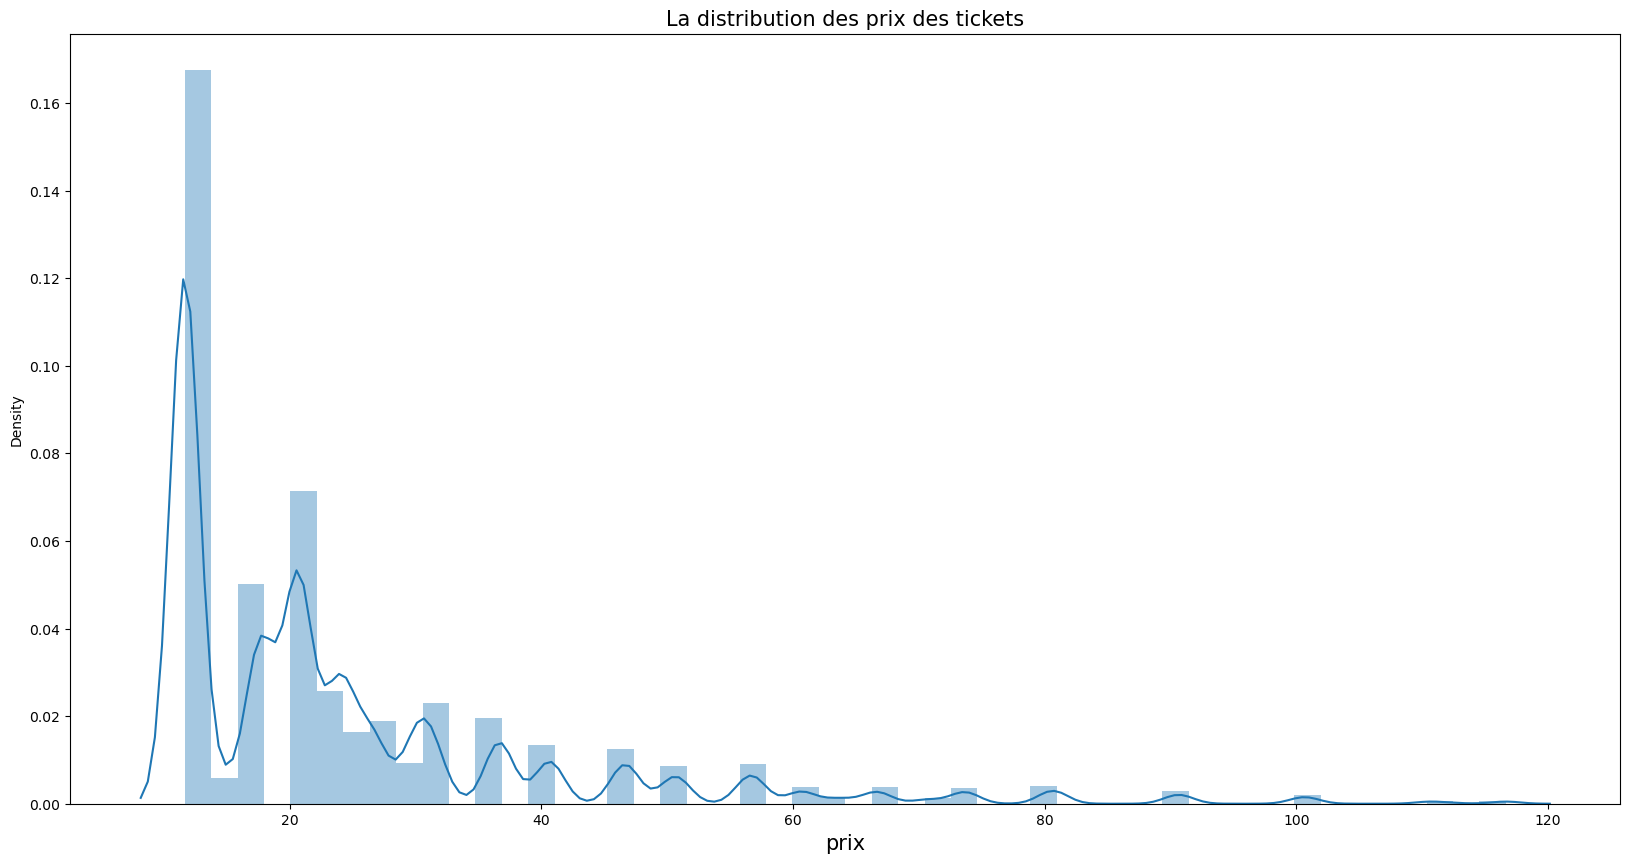

In [73]:
plt.figure(figsize=(20, 10))
sns.distplot(a=df['price'])
plt.xlabel('prix', fontsize=15)
plt.title('La distribution des prix des tickets', fontsize=15)

plt.show()
     

On peut remarquer que la distrubution du prix sont en plus grande majorité entre 13 e et 30 e , avec une dominance dans les 15e.

In [15]:
df['demand'].describe()

count    632841.000000
mean          3.000149
std           7.256572
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         192.000000
Name: demand, dtype: float64

On remarque que la demande pour ticket train à sale_day_x du jour de depart et d'un certain prix est en moyenne egale à 3 

/var/folders/3j/vgx6n6q57s93vrqqf94csc5m0000gn/T/ipykernel_36583/4152101.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['demand'])
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


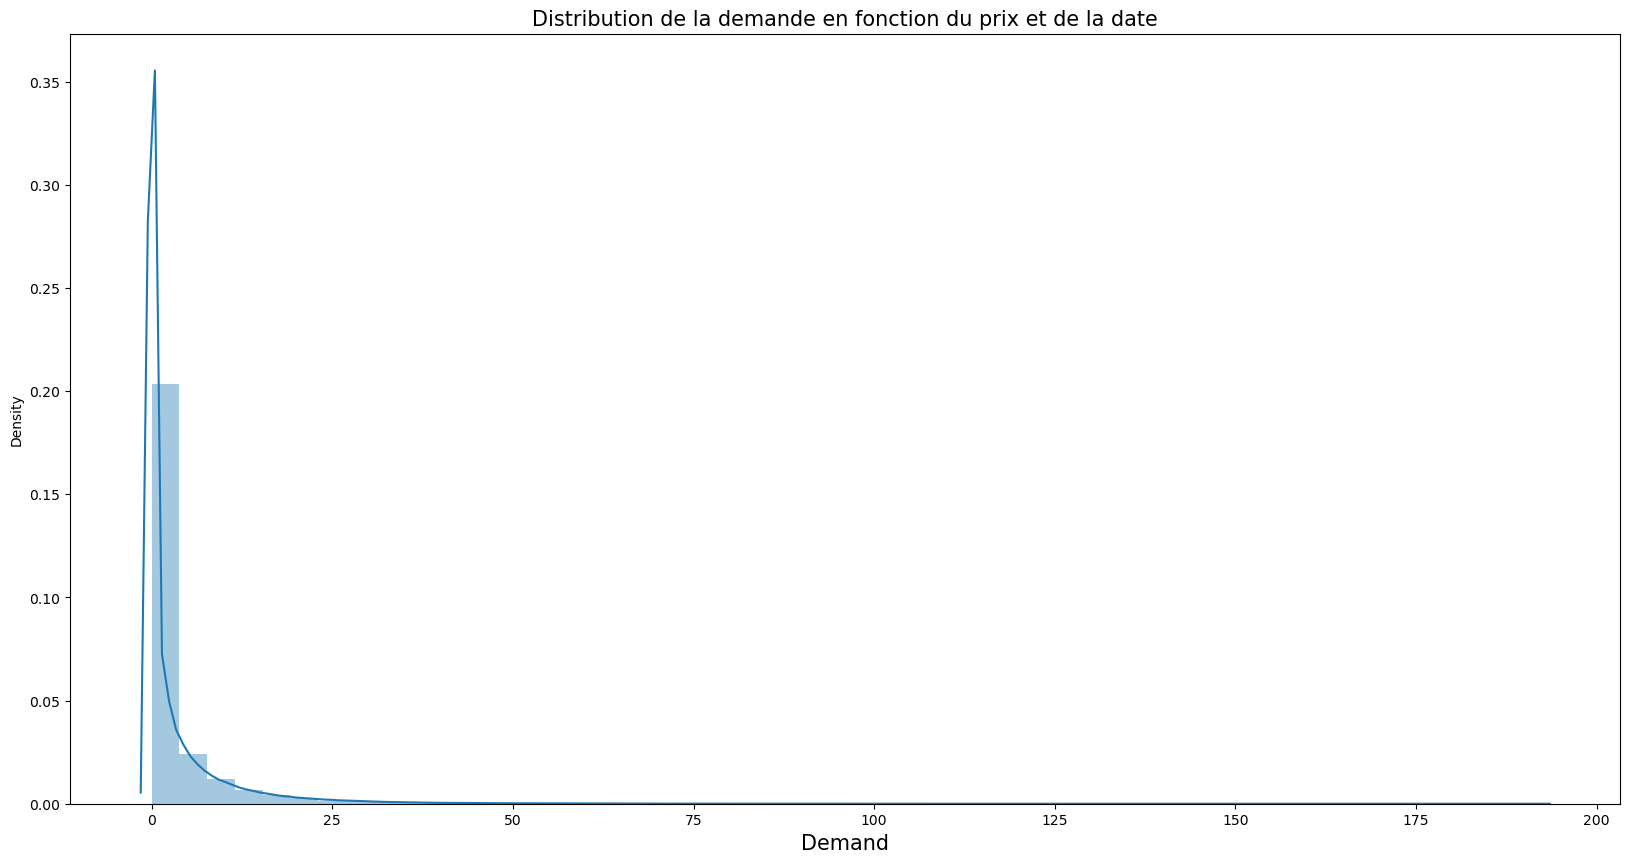

In [74]:
plt.figure(figsize=(20, 10))
sns.distplot(a=df['demand'])
plt.xlabel('Demand', fontsize=15)
plt.title('Distribution de la demande en fonction du prix et de la date', fontsize=15)

plt.show()

## Le nombre d'unique itineraire ('origin_station_name', 'destination_station_name') present dans le dataset 

In [75]:
unique_routes = df.groupby(['origin_station_name', 'destination_station_name']).size().reset_index(name='count')
num_unique_routes = unique_routes.shape[0]
print("Nombre d'itinéraires uniques possibles :", num_unique_routes)
print(unique_routes)


Nombre d'itinéraires uniques possibles : 8
  origin_station_name destination_station_name   count
0               b'ag'                   b'cpe'   69065
1               b'bb'                   b'cgm'  124103
2               b'bb'                    b'rb'   60705
3              b'cdm'                   b'cpe'   28802
4              b'cgm'                    b'bb'  179872
5              b'cpe'                    b'ag'   59702
6              b'cpe'                   b'cdm'   30035
7               b'rb'                    b'bb'   80557


On a 8 unique trajets possibles dans notre dataset , les plus frequents sont les trajets (cgm - bb) et (bb - cgm) , on va ajouter dans un premier temps une nouvelle variable **train_route** qui va representer du coup les trajets d'une maniere plus efficace, et puis  on va visualiser le temps moyen de chaque trajets 

In [76]:
df['train_route'] = df['origin_station_name'].astype(str) + ' - ' + df['destination_station_name'].astype(str)


In [77]:
len(df.groupby(['train_route']))

8

In [78]:
average_travel_time = df.groupby('train_route')['od_travel_time_minutes'].mean().reset_index()
print(average_travel_time)


  train_route  od_travel_time_minutes
0    ag - cpe              144.978441
1    bb - cgm               33.935183
2     bb - rb              210.910386
3   cdm - cpe              290.396466
4    cgm - bb               35.508139
5    cpe - ag              151.740947
6   cpe - cdm              283.736541
7     rb - bb              199.759524


In [79]:
mean_time_travel = df.groupby('train_route')['od_travel_time_minutes'].mean()
df['mean_time_travel'] = df['train_route'].map(mean_time_travel)

• On peut remarquer que les trajets (cgm - bb) et (bb - cgm) sont les plus rapides -33 minutes- et les trajets les plus longs sont (cpe - cdm ) (cdm - cpe) eviron 286 minutes

• Ce qui peut être interessant pour la suite de l'analyse c'est de voir l'evolution du prix dépendamment des differents trajet

## L'evolution des prix des tickets en fonction de nombre de jours avant le depart par trajet

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

<Axes: xlabel='sale_day_x', ylabel='price'>

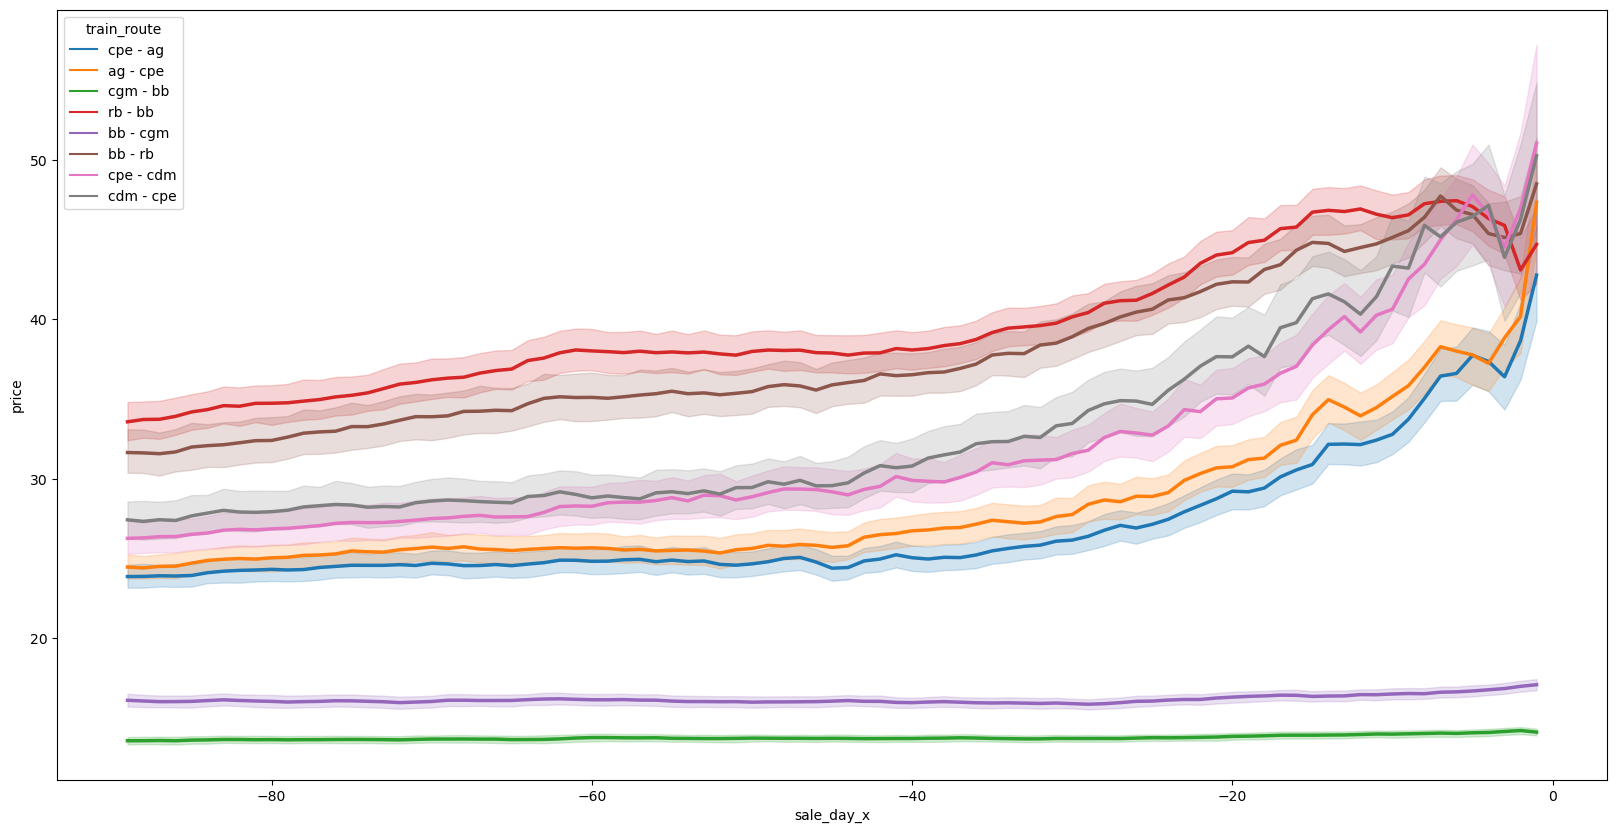

In [22]:
plt.figure(figsize=(20, 10)) 


sns.lineplot(x='sale_day_x',y='price',hue='train_route',data=df, palette="tab10", linewidth=2.5)

• On peut remarquer que les prix des deux trajets 'cgm - bb' et 'bb-cgm' sont constants et ne varient pas tellement meme si on achete les billets le meme jour du depart , etant donnée que c'est les deux trajets  les plus frequent (179872 et 124103) et les plus rapides , et pour les autres trajets les prix sont croissant en fontion de sale_date_x

## Evolution de la demande en fonction de sale_day_x pour chaque trajet

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

<Axes: xlabel='sale_day_x', ylabel='demand'>

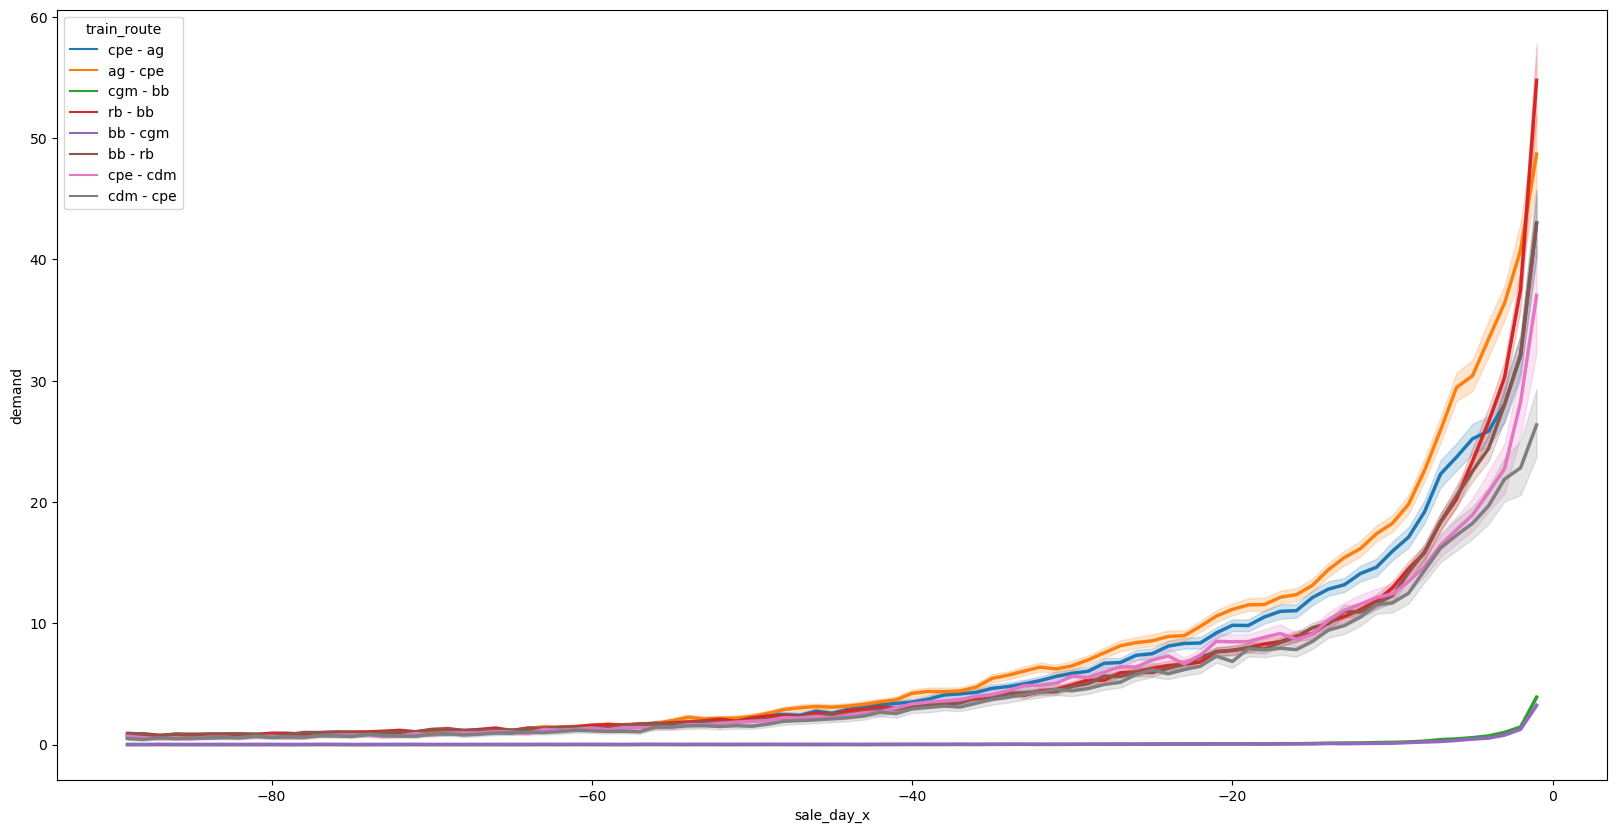

In [80]:
plt.figure(figsize=(20, 10)) 


sns.lineplot(x='sale_day_x',y='demand',hue='train_route',data=df, palette="tab10", linewidth=2.5)

• Pareil la demande connait une croissance en fonction du nombre de jour d'achat du billet avant le jour du depart

• les trajets cgm-bb sont les trajets ayant le moins de demande

## comparaison des prix selon le temps moyen des trajets 

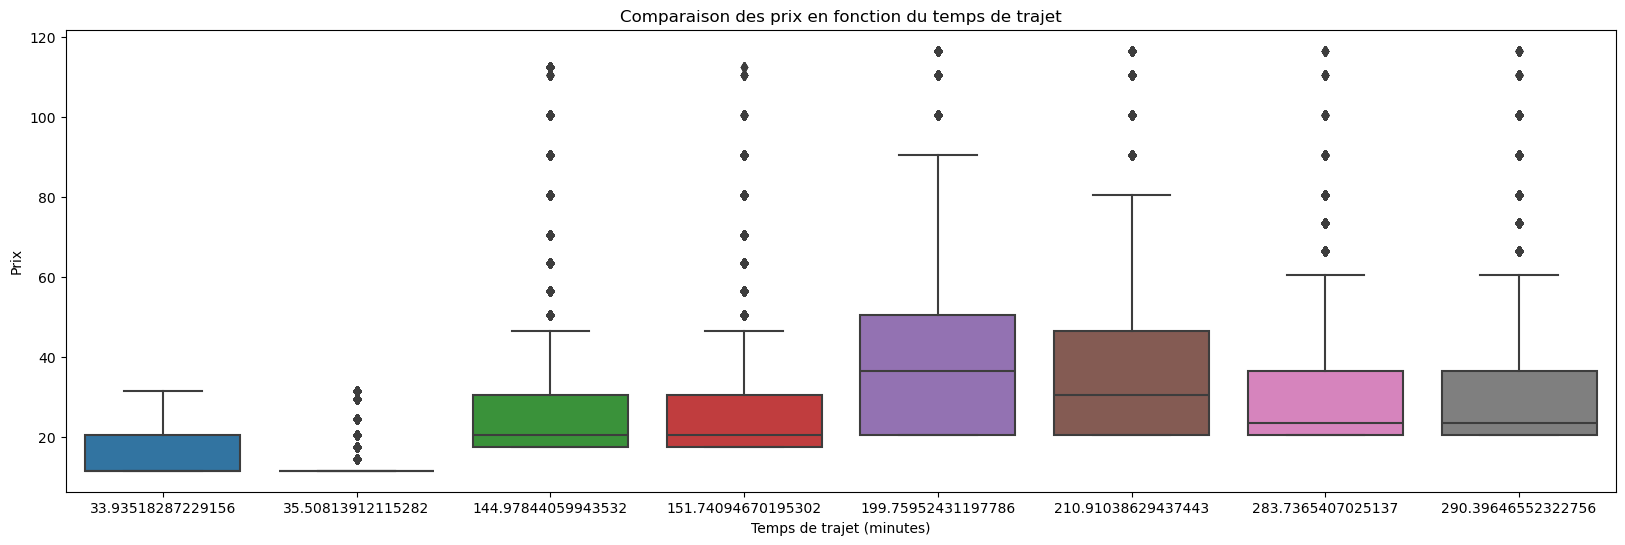

In [81]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='mean_time_travel', y='price', data=df)
plt.xlabel('Temps de trajet (minutes)')
plt.ylabel('Prix')
plt.title('Comparaison des prix en fonction du temps de trajet')
plt.show()

• On peut remarquer que ce n'est pas forcement le plus long trajet qui est le plus cher 

## les plages de valeurs possibles du prix selon les jours de la semaine

Text(0, 0.5, 'prix')

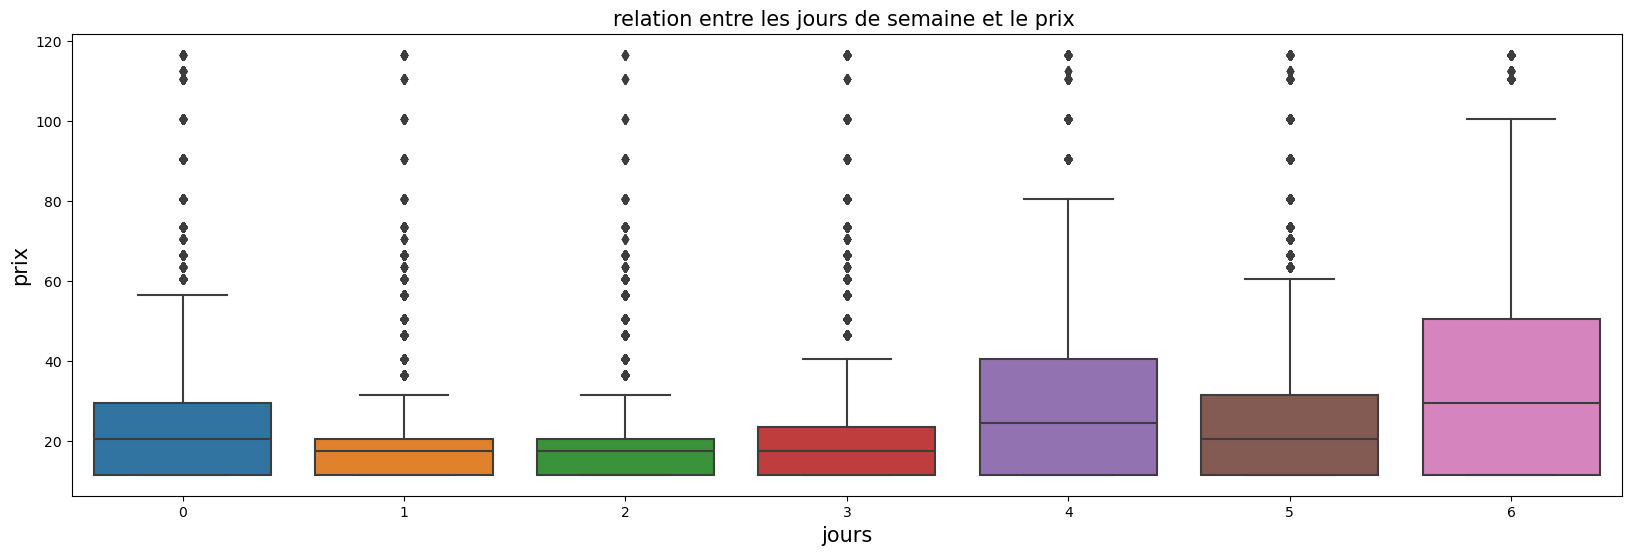

In [83]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='od_origin_weekday', y='price', data=df)
plt.title('relation entre les jours de semaine et le prix ', fontsize=15)
plt.xlabel('jours', fontsize=15)
plt.ylabel('prix', fontsize=15)


On peut remarquer que les prix  sont assez élevés (les plus grandes medianes) le vendredi et le dimanche 

# L'analyse de la correlation 

In [84]:
cdf = df.select_dtypes(include=['float64', 'int64', 'datetime64'])


In [85]:
cdf.columns

Index(['demand', 'departure_date', 'destination_current_public_holiday',
       'destination_current_school_holiday',
       'destination_days_to_next_public_holiday',
       'destination_days_to_next_school_holiday', 'od_destination_time',
       'od_number_of_similar_12_hours', 'od_number_of_similar_2_hours',
       'od_number_of_similar_4_hours', 'od_origin_month', 'od_origin_time',
       'od_origin_week', 'od_origin_weekday', 'od_origin_year',
       'od_travel_time_minutes', 'origin_current_public_holiday',
       'origin_current_school_holiday', 'origin_days_to_next_public_holiday',
       'origin_days_to_next_school_holiday', 'price', 'sale_date', 'sale_day',
       'sale_day_x', 'sale_month', 'sale_week', 'sale_weekday', 'sale_year',
       'mean_time_travel'],
      dtype='object')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


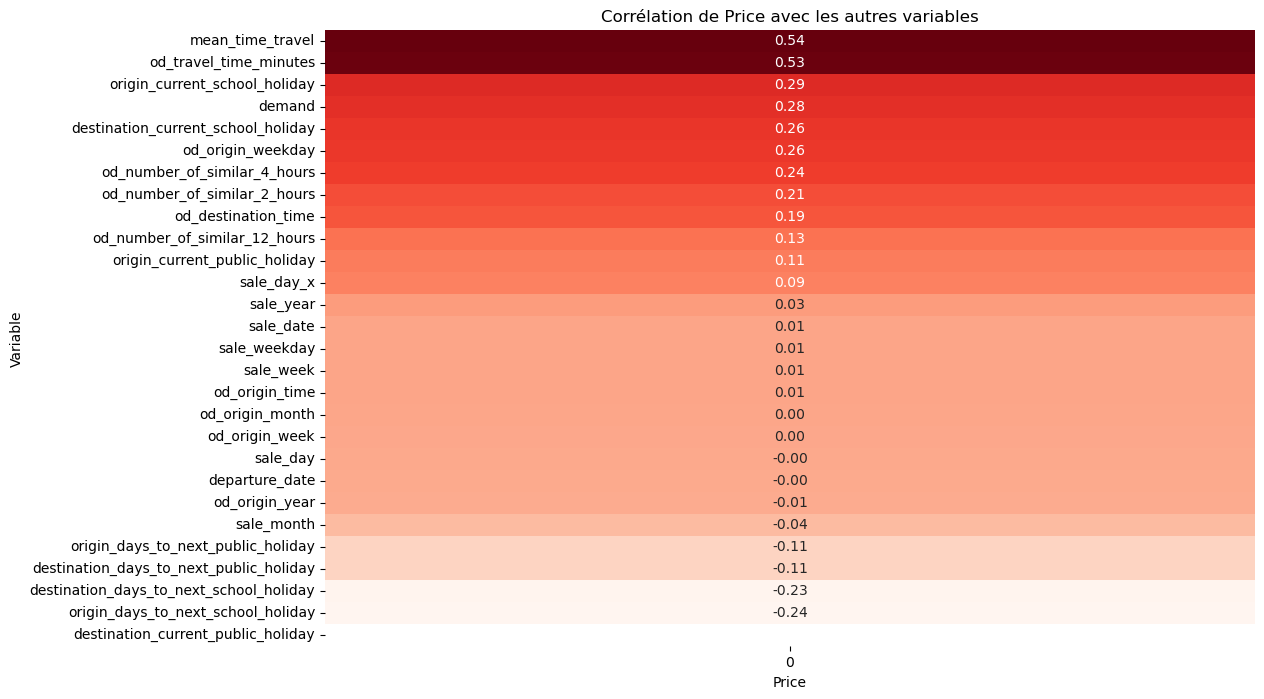

In [86]:
price_corr = cdf.drop('price', axis=1).corrwith(cdf['price'])
sorted_corr = price_corr.sort_values(ascending=False)

# Créer un heatmap de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(sorted_corr.to_frame(), annot=True, cmap='Reds', fmt=".2f", cbar=False)
plt.title('Corrélation de Price avec les autres variables')
plt.xlabel('Price')
plt.ylabel('Variable')
plt.show()

On peut voir grace au tableau de coefficients de correlation de pearson , que le prix est tres correlé au temps moyen d'un trajet/temps d'un trajet , il existe aussi une forte correlation avec origin_current_school_holiday/destination_current_school_holiday  et c'est logique vu que les prix sont plus élevé lors des périodes des vacances.Il existe une correlation entre le prix et la frequence des trains (od_number_of_X_train) 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


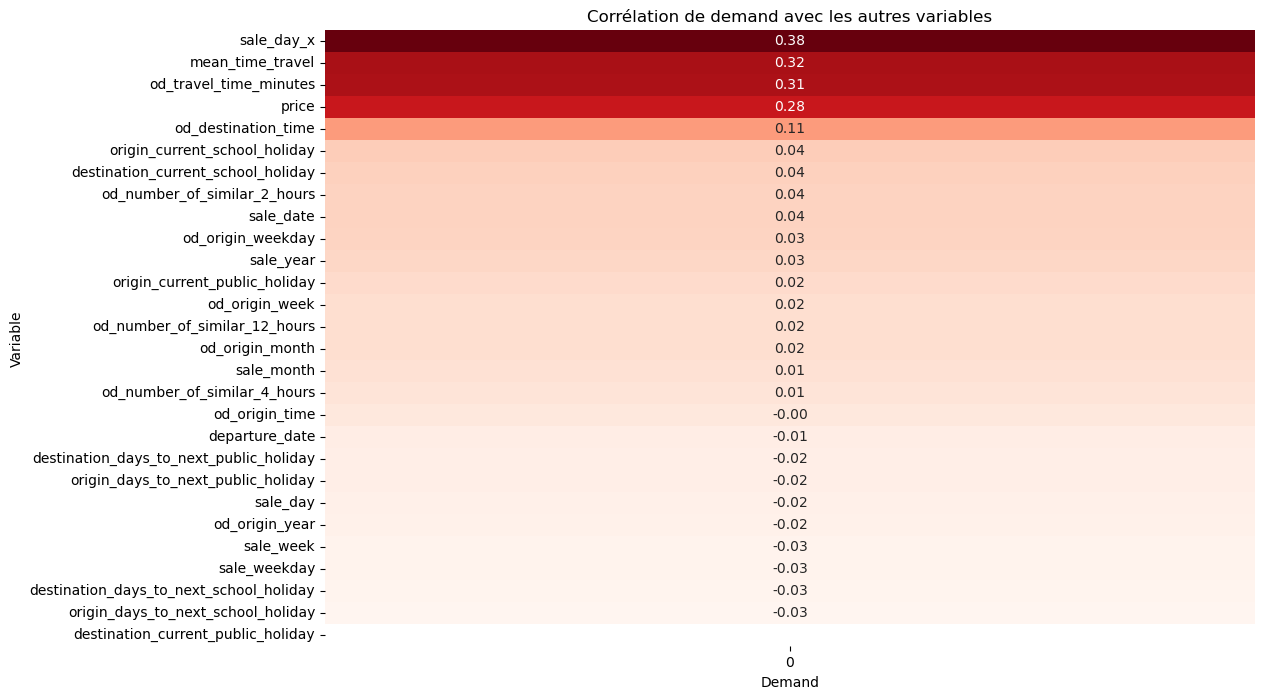

In [87]:

demand_corr = cdf.drop('demand', axis=1).corrwith(cdf['demand'])
demand_corr =demand_corr.sort_values(ascending=False)

# Créer un heatmap de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(demand_corr.to_frame(), annot=True, cmap='Reds', fmt=".2f", cbar=False)
plt.title('Corrélation de demand avec les autres variables')
plt.xlabel('Demand')
plt.ylabel('Variable')
plt.show()

Pour la demande , il y'a une forte correlation avec le nombre de jour entre le depart et la date de l'achat du billet sale_day_x, temps du trajet , le prix et l'heure d'arrivée od_destination_time. 

Caractéristiques les plus impactantes :
                                    Feature  Importance
20                               sale_day_x    0.420899
13                   od_travel_time_minutes    0.261003
18                                    price    0.056103
19                                 sale_day    0.034674
9                            od_origin_time    0.022343
3   destination_days_to_next_school_holiday    0.022215
4                       od_destination_time    0.020943
11                        od_origin_weekday    0.019377
17       origin_days_to_next_school_holiday    0.019188
22                                sale_week    0.015982
16       origin_days_to_next_public_holiday    0.015955
2   destination_days_to_next_public_holiday    0.015880
23                             sale_weekday    0.015303
10                           od_origin_week    0.012980
5             od_number_of_similar_12_hours    0.012383
7              od_number_of_similar_4_hours    0.011899
6       

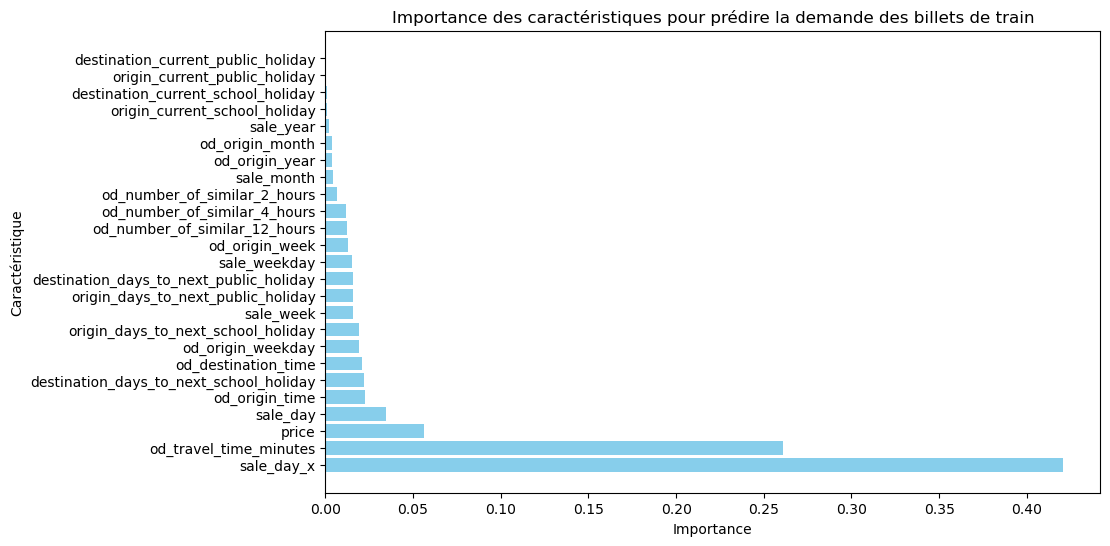

In [102]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
# Sélection de la variable cible
target = 'demand'
cdf = df.select_dtypes(include=['float64', 'int64'])

# Sélection des caractéristiques (toutes sauf la variable cible)
features = cdf.columns[cdf.columns != target]

# Utiliser seulement les colonnes numériques pour l'analyse
# Sélection des données
X = cdf[features]
y = cdf[target]

# Création et entraînement du modèle de forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Affichage de l'importance des caractéristiques
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Affichage des caractéristiques les plus impactantes
print("Caractéristiques les plus impactantes :")
print(feature_importance_df)

# Tracé de l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques pour prédire la demande des billets de train')
plt.show()



# Evolution de la demande par rapport au prix

## globalement

/var/folders/3j/vgx6n6q57s93vrqqf94csc5m0000gn/T/ipykernel_36583/1314159626.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='price',y='demand',data=df, palette="tab10", linewidth=2.5)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='demand'>

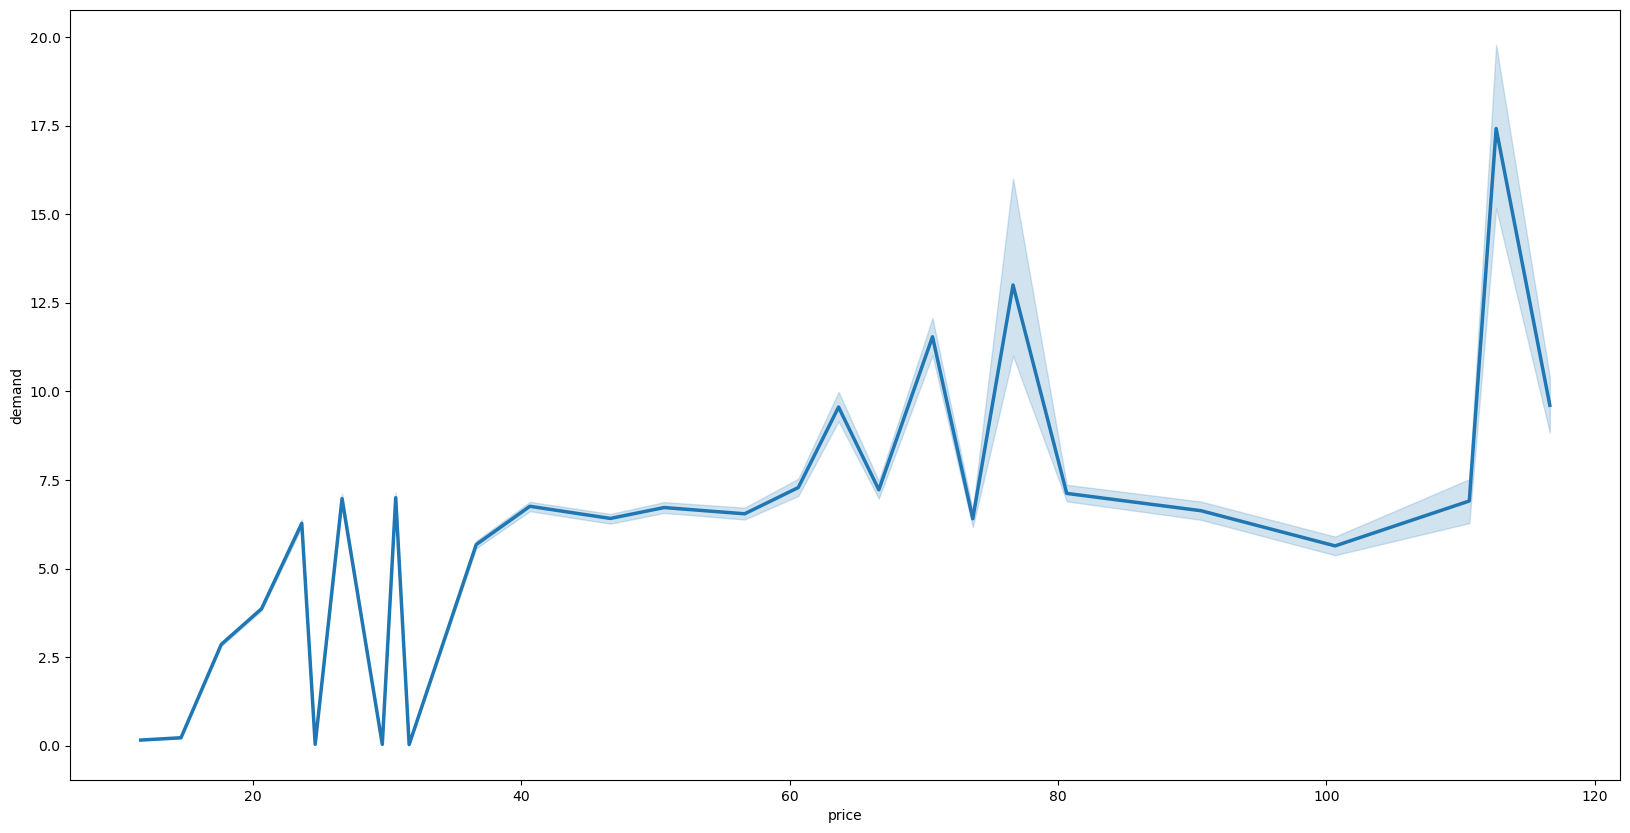

In [88]:
plt.figure(figsize=(20, 10)) 

sns.lineplot(x='price',y='demand',data=df, palette="tab10", linewidth=2.5)


## par trajet 

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

<Axes: xlabel='price', ylabel='demand'>

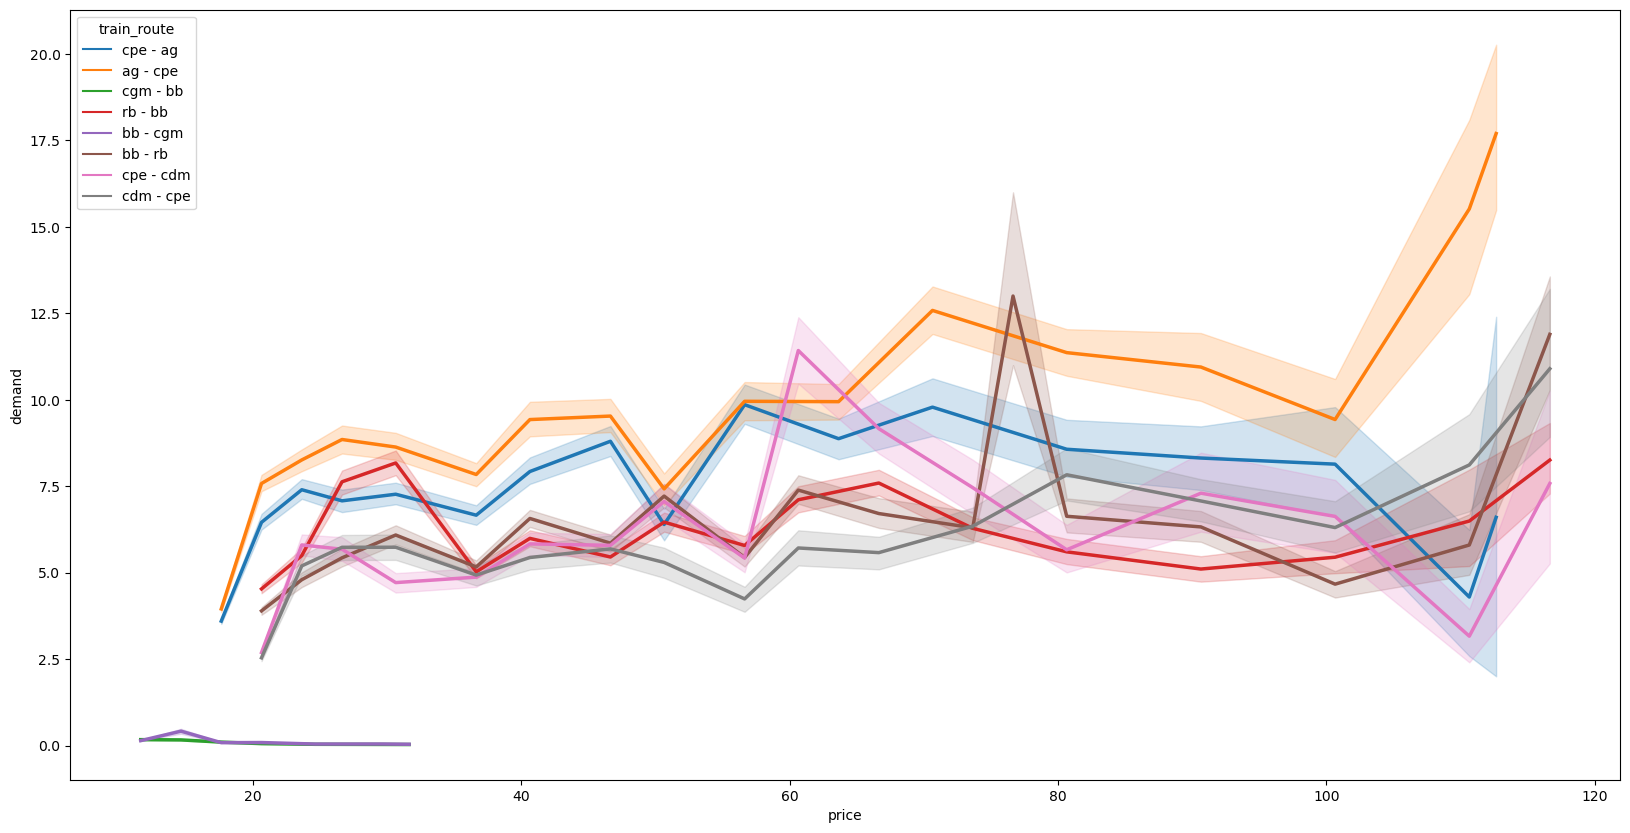

In [89]:
plt.figure(figsize=(20, 10)) 
sns.lineplot(x='price',y='demand',hue='train_route',data=df, palette="tab10", linewidth=2.5)

• Pour les deux trajets qui sont assez frequents (cgm - bb)/(bb - cgm ) l'evolution du prix n'influent pas sur la demande et la demande reste relativement basse.

• Pour les autres itineraires , on peut remarquer que la demande fluctue par rapport aux prix toute en gardant une pente moyennement croissante, mais connait à la fin (à partir de 100e) une forte croissance par rapport aux prix.On peut expliquer cela que les gens ont tendance d'acheter leurs billets trains quand la date de depart approche ce qui a pour consequence l'augmentation des prix des tickets trains comme on a pu l'apercevoir dans le graphique (price x sale_day_x)

## Relation entre l'heure d'arrivée et la demande

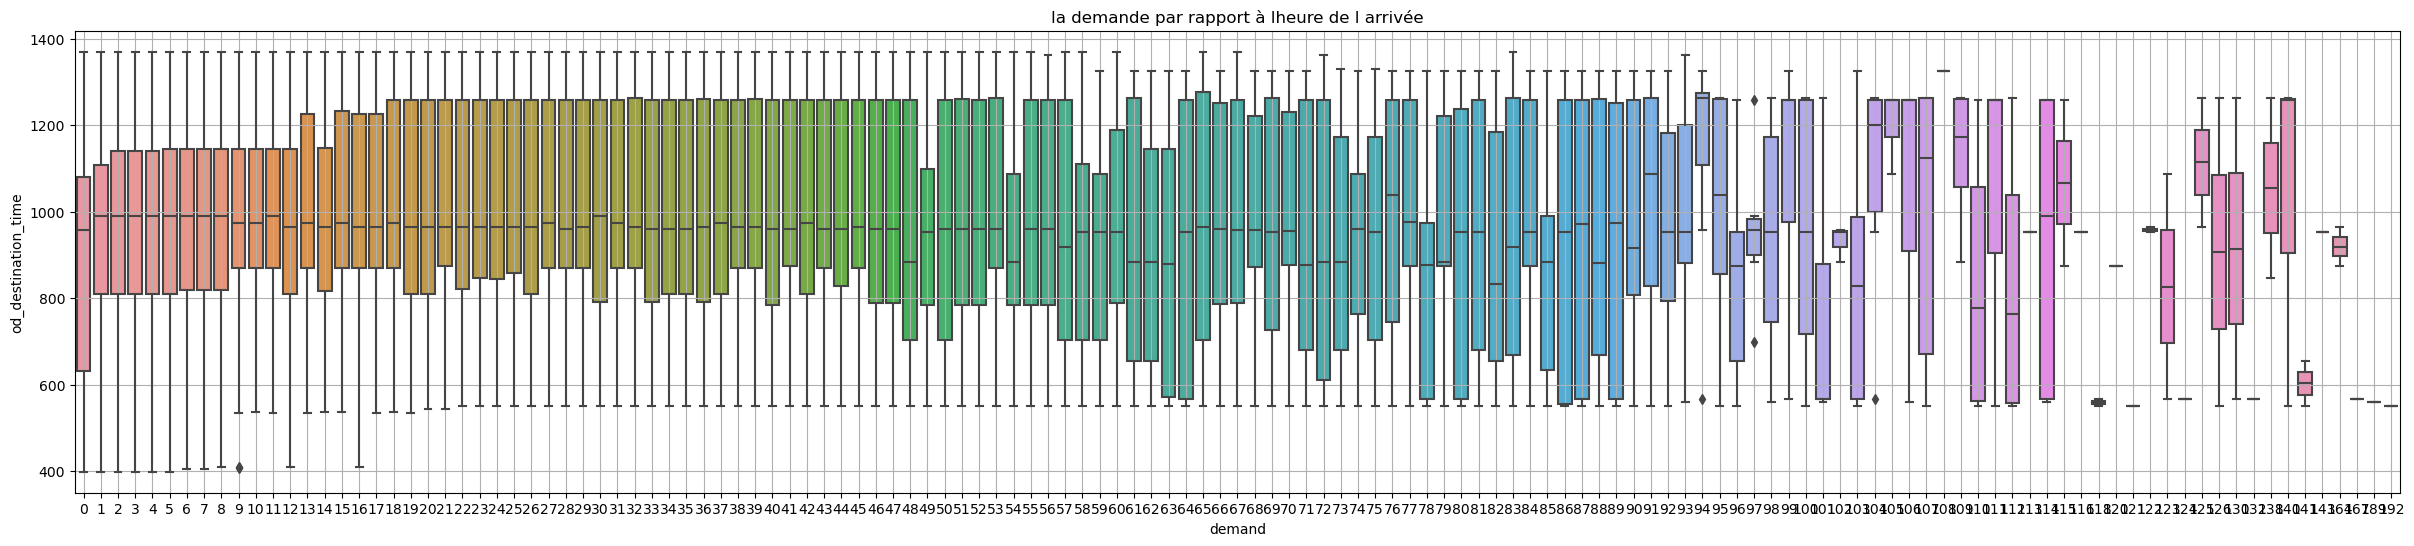

In [32]:
plt.figure(figsize=(30, 6))
sns.boxplot(x='demand', y='od_destination_time', data=df)
plt.title('la demande par rapport à lheure de l arrivée')
plt.xlabel('demand')
plt.ylabel('od_destination_time')
plt.grid(True)
plt.show()

On peut remarquer que les trains sont  plus sollicités (plus grande demande) si lheure d'arrivée est entre 13h et 23h (800min -1300 min )





• Après cette analyse on passe à la modélisation statistiques: d'aprés les graphes d'evolution demande/sale_day_x et demande/price, il est difficile d'assumer qu'il y'a une certaine linéarité entre les variables expliquatives (sale_day_x, price,..) et notre variable dependante 'demand' , au moins dans l'ensemble des itinéraires possible, donc je doute que la regression lineaire ait des performance remarquable pour predire la demande.Neanmoins , j'implementerais la regression lineaire pour qu'on s'en sert comme etant une baseline.

• pour mes prédictions et grace au tableaux de correlation et de regression , je me servirais de ces inputs ['od_travel_time_minutes', 'price', 'sale_day_x', 'od_destination_time'] que je trouve les plus pertinents pour nos forecasts.



# Modèle

In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Sélection des caractéristiques
features = ['od_travel_time_minutes', 'price', 'sale_day_x', 'od_destination_time']

# Sélection de la variable cible
target = 'demand'

# Création du DataFrame contenant uniquement les caractéristiques sélectionnées et la variable cible
df_selected_train = df[features + [target]]
df_selected_test = df_test[features + [target]]


# Supprimer les lignes avec des valeurs manquantes, si nécessaire
df_selected_train.dropna(inplace=True)
df_selected_test.dropna(inplace=True)


# Séparation des données en ensembles d'entraînement et de test
X_train = df_selected_train[features]
y_train = df_selected_train[target]

X_test=df_selected_test[features]
y_test=df_selected_test[target]


# Normalisation des caractéristiques

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Évaluation du modèle sur l'ensemble de test

score = model.score(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Score R2 sur l'ensemble de test :", score)
print("Mean Squared Error (MSE) :", mse)
print("Mean Absolute Error (MAE) :", mae)
print("Root Mean Squared Error (RMSE) :", rmse)

/var/folders/3j/vgx6n6q57s93vrqqf94csc5m0000gn/T/ipykernel_36583/1549685926.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_train.dropna(inplace=True)
/var/folders/3j/vgx6n6q57s93vrqqf94csc5m0000gn/T/ipykernel_36583/1549685926.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test.dropna(inplace=True)


Score R2 sur l'ensemble de test : 0.26354522690415816
Mean Squared Error (MSE) : 44.43330410339415
Mean Absolute Error (MAE) : 3.658039212863399
Root Mean Squared Error (RMSE) : 6.665831088723607


• Comme prédit , le modele de regression a du mal a expliqué les variations de la demande en fonction des variation des variables independantes qu'on a choisis (score ${R}^2$ très faible).Cependant, pour pouvoir capturer ces relations non lineaires entre la demande et la variables explicatives , je vais utiliser des modeles un peu plus complexe RandomForest et GradientBoostingRegressor. 

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

features = ['od_travel_time_minutes', 'price', 'sale_day_x', 'od_destination_time']

# Sélection de la variable cible
target = 'demand'

# Création du DataFrame contenant uniquement les caractéristiques sélectionnées et la variable cible
df_selected_train = df[features + [target]]
df_selected_test = df_test[features + [target]]


# Supprimer les lignes avec des valeurs manquantes, si nécessaire
df_selected_train.dropna(inplace=True)
df_selected_test.dropna(inplace=True)


# Séparation des données en ensembles d'entraînement et de test
X_train = df_selected_train[features]
y_train = df_selected_train[target]

X_test=df_selected_test[features]
y_test=df_selected_test[target]


# Normalisation des caractéristiques

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation et entraînement du modèle de forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf_model.predict(X_test_scaled)

# Calcul du score R2
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Score R2 sur l'ensemble de test :", r2)
print("Mean Squared Error (MSE) :", mse)
print("Mean Absolute Error (MAE) :", mae)
print("Root Mean Squared Error (RMSE) :", rmse)

/var/folders/3j/vgx6n6q57s93vrqqf94csc5m0000gn/T/ipykernel_36583/3108626264.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_train.dropna(inplace=True)
/var/folders/3j/vgx6n6q57s93vrqqf94csc5m0000gn/T/ipykernel_36583/3108626264.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test.dropna(inplace=True)


Score R2 sur l'ensemble de test : 0.6398634078032557
Mean Squared Error (MSE) : 21.72850160583518
Mean Absolute Error (MAE) : 2.007363325400964
Root Mean Squared Error (RMSE) : 4.6613840869247385


In [92]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

features = ['od_travel_time_minutes', 'price', 'sale_day_x', 'od_destination_time']

# Sélection de la variable cible
target = 'demand'

# Création du DataFrame contenant uniquement les caractéristiques sélectionnées et la variable cible
df_selected_train = df[features + [target]]
df_selected_test = df_test[features + [target]]


# Supprimer les lignes avec des valeurs manquantes, si nécessaire
df_selected_train.dropna(inplace=True)
df_selected_test.dropna(inplace=True)


# Séparation des données en ensembles d'entraînement et de test
X_train = df_selected_train[features]
y_train = df_selected_train[target]

X_test=df_selected_test[features]
y_test=df_selected_test[target]


# Normalisation des caractéristiques

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation et entraînement du modèle de forêt aléatoire
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = gb_model.predict(X_test_scaled)

# Calcul du score R2
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Score R2 sur l'ensemble de test :", r2)
print("Mean Squared Error (MSE) :", mse)
print("Mean Absolute Error (MAE) :", mae)
print("Root Mean Squared Error (RMSE) :", rmse)

/var/folders/3j/vgx6n6q57s93vrqqf94csc5m0000gn/T/ipykernel_36583/4104022805.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_train.dropna(inplace=True)
/var/folders/3j/vgx6n6q57s93vrqqf94csc5m0000gn/T/ipykernel_36583/4104022805.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_test.dropna(inplace=True)


Score R2 sur l'ensemble de test : 0.675990232541565
Mean Squared Error (MSE) : 19.54882371042365
Mean Absolute Error (MAE) : 2.0220151809364513
Root Mean Squared Error (RMSE) : 4.42140517374552


• Dans l'ensemble les deux modèles ont de meilleures résultats que la regression surtout pour expliquer la variance de la demande , pour la suite de l'analyse j'utiliserais le modèle GradientBoostingRegressor qui a des performances meilleures dans l'ensemble que celles de Randomforests 

# Evaluation du modèle

## les performances du modele par rapport à sale_day_x

Moyenne R2 Score pour chaque jour sale_day_x : -0.11502305118852345
Moyenne Mean Absolute Error (MAE) pour chaque jour sale_day_x : 2.09504893474605
Moyenne Root Mean Squared Error (RMSE) pour chaque jour sale_day_x : 3.6592278584784053


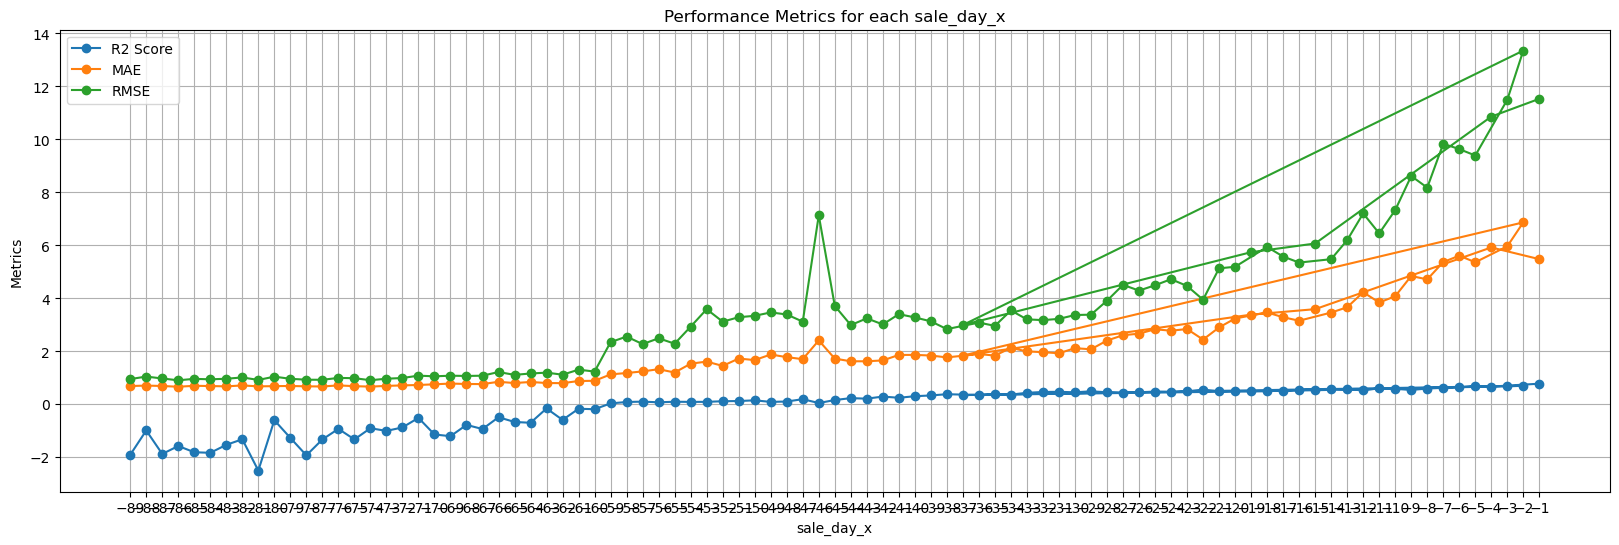

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Créer une liste pour stocker les métriques pour chaque sale_day_x
r2_scores = []
mae_scores = []
rmse_scores = []

# Boucle sur chaque jour sale_day_x dans df_test
for day in df_test['sale_day_x'].unique():
    # Filtrer les données pour le jour spécifique
    test_day = df_test[df_test['sale_day_x'] == day]
    
    # Sélectionner les caractéristiques et la cible
    X_test_day = test_day[features]
    y_test_day = test_day[target]
    
    # Normaliser les caractéristiques
    X_test_day_scaled = scaler.transform(X_test_day)
    
    # Prédiction sur l'ensemble de test pour le jour spécifique
    y_pred_day = gb_model.predict(X_test_day_scaled)
    
    # Calcul des métriques pour le jour spécifique
    r2_day = r2_score(y_test_day, y_pred_day)
    mae_day = mean_absolute_error(y_test_day, y_pred_day)
    rmse_day = mean_squared_error(y_test_day, y_pred_day, squared=False)
    
    # Ajouter les métriques à la liste
    r2_scores.append(r2_day)
    mae_scores.append(mae_day)
    rmse_scores.append(rmse_day)

# Affichage des métriques pour chaque jour sale_day_x
print("Moyenne R2 Score pour chaque jour sale_day_x :", np.mean(r2_scores))
print("Moyenne Mean Absolute Error (MAE) pour chaque jour sale_day_x :", np.mean(mae_scores))
print("Moyenne Root Mean Squared Error (RMSE) pour chaque jour sale_day_x :", np.mean(rmse_scores))

# Tracé des métriques pour chaque jour sale_day_x
plt.figure(figsize=(20, 6))
plt.plot(df_test['sale_day_x'].unique(), r2_scores, label='R2 Score', marker='o')
plt.plot(df_test['sale_day_x'].unique(), mae_scores, label='MAE', marker='o')
plt.plot(df_test['sale_day_x'].unique(), rmse_scores, label='RMSE', marker='o')
plt.xlabel('sale_day_x')
plt.ylabel('Metrics')
plt.title('Performance Metrics for each sale_day_x')
plt.legend()
plt.grid(True)
plt.xticks(df_test['sale_day_x'].unique())
plt.show()


• On peut remarquer que le modele à du mal à expliquer la variance de la demande pour les jours d'achat tres lointain du jour du depart.(score ${R}^2$ negatif)

• Les autres métriques, telles que le RMSE et le MAE, montrent des valeurs relativement faibles pour les jours éloignés de la date de départ, ce qui est cohérent car la demande est généralement faible pendant cette période. Au fur et à mesure que la date de départ approche, ces métriques augmentent, ce qui indique une augmentation de l'erreur de prédiction à mesure que la demande devient plus importante. Cependant, malgré cette augmentation, les valeurs restent dans une plage raisonnable, généralement inférieures à 15, ce qui suggère que le modèle reste performant même lorsque la demande est très élevée à proximité de la date de départ. En résumé, le modèle semble bien généraliser aux différentes périodes, avec des performances cohérentes et raisonnables tout au long de l'horizon temporel considéré.

• comme peut le prouver le tableaux ci dessous qui represente le nombre de demande totale par jour pour les derniers 10 jours avant le depart.

In [94]:
# Filtrer les lignes où sale_day_x est dans l'intervalle [-10, 0]
filtered_data = df[(df['sale_day_x'] >= -10) & (df['sale_day_x'] <= 0)]

# Calculer la somme de la demande pour chaque sale_day_x
demand_total_per_day = filtered_data.groupby('sale_day_x')['demand'].sum()

# Afficher les résultats
print(demand_total_per_day)


sale_day_x
-10    55704
-9     60661
-8     66269
-7     73260
-6     80280
-5     80966
-4     83885
-3     82763
-2     81977
-1     96115
Name: demand, dtype: int64


## la performance du modèle par rapport au trajet (origine-destination)

In [95]:
df_test['train_route'] = df_test['origin_station_name'].astype(str) + ' - ' + df_test['destination_station_name'].astype(str)


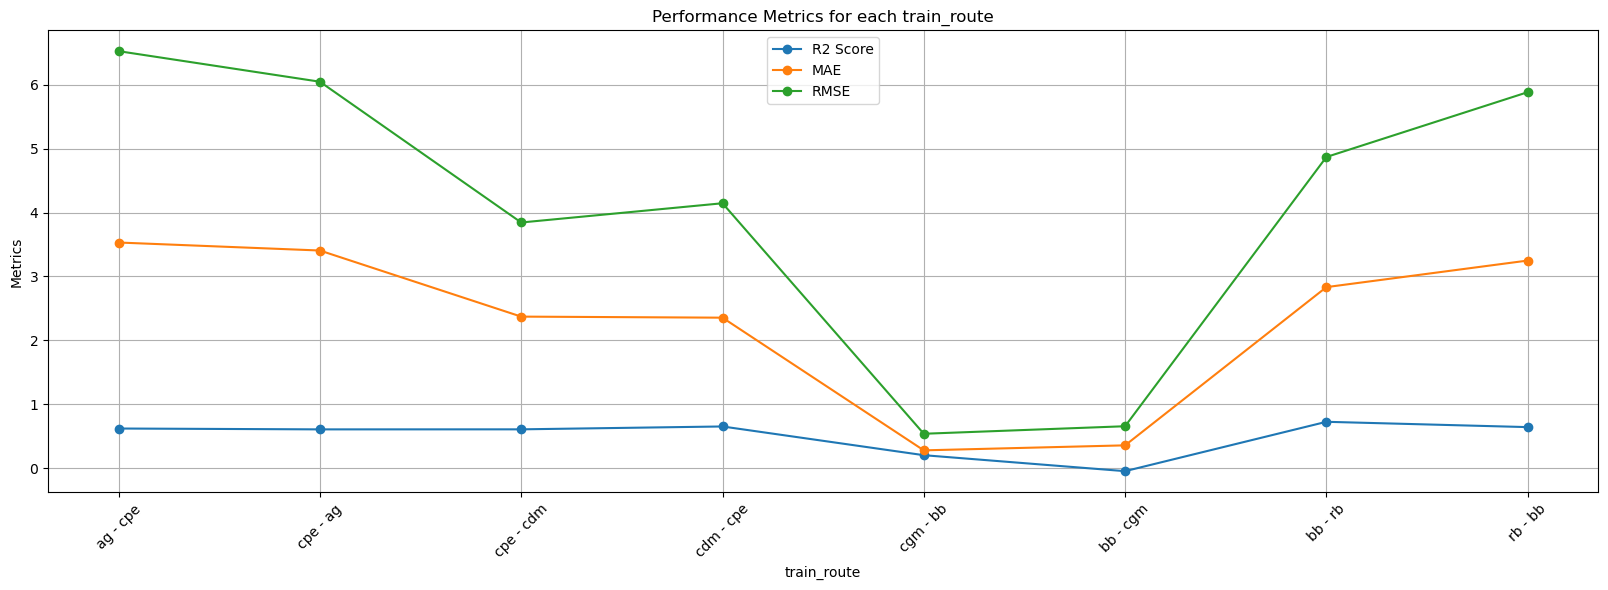

In [96]:
# Créer une liste pour stocker les métriques pour chaque train_route
r2_scores = []
mae_scores = []
rmse_scores = []

# Boucle sur chaque train_route dans df_test
for route in df_test['train_route'].unique():
    # Filtrer les données pour le trajet spécifique
    test_route = df_test[df_test['train_route'] == route]
    
    # Sélectionner les caractéristiques et la cible
    X_test_route = test_route[features]
    y_test_route = test_route[target]
    
    # Normaliser les caractéristiques
    X_test_route_scaled = scaler.transform(X_test_route)
    
    # Prédiction sur l'ensemble de test pour le trajet spécifique
    y_pred_route = gb_model.predict(X_test_route_scaled)
    
    # Calcul des métriques pour le trajet spécifique
    r2_route = r2_score(y_test_route, y_pred_route)
    mse_route = mean_squared_error(y_test_route, y_pred_route)
    mae_route = mean_absolute_error(y_test_route, y_pred_route)
    rmse_route = mean_squared_error(y_test_route, y_pred_route, squared=False)
    
    # Ajouter les métriques à la liste
    r2_scores.append(r2_route)
    mae_scores.append(mae_route)
    rmse_scores.append(rmse_route)



# Tracé des métriques pour chaque train_route
plt.figure(figsize=(20, 6))
plt.plot(df_test['train_route'].unique(), r2_scores, label='R2 Score', marker='o')
plt.plot(df_test['train_route'].unique(), mae_scores, label='MAE', marker='o')
plt.plot(df_test['train_route'].unique(), rmse_scores, label='RMSE', marker='o')
plt.xlabel('train_route')
plt.ylabel('Metrics')
plt.title('Performance Metrics for each train_route')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



• Il est difficile de comparer directement les métriques entre différents trajets, car la demande de billets de train peut varier considérablement d'un trajet à l'autre. Par conséquent, les valeurs absolues des métriques peuvent ne pas avoir beaucoup de sens lorsqu'elles sont comparées entre différents trajets.

Cependant, les métriques peuvent nous donner une idée de la performance relative du modèle pour différents trajets. Par exemple, si la demande de billets de train varie sur une échelle relativement petite, par exemple de 0 à 50, un RMSE de 6,5 pourrait être considéré comme relativement élevé, car il représente une proportion importante de la plage de valeurs de la demande. En revanche, si la demande varie sur une plus grande échelle, comme de 0 à 200, un RMSE de 6,5 pourrait être considéré comme plus acceptable, car il représente une proportion plus faible de la plage de valeurs de la demande.

Ainsi, bien que les métriques ne puissent pas être directement comparées entre différents trajets, elles peuvent quand même fournir des informations utiles sur la performance relative du modèle pour chaque trajet.

• C'est pour ca que j'ai calculé pour chaque trajet le nombre moyen de la demande pour pouvoir comprendre si nos metrics sont relativement bien.

In [97]:
# Grouper les données par train_route, departure_date, od_origin_time et od_destination_time
grouped = df_test.groupby(['train_route', 'departure_date', 'od_origin_time', 'od_destination_time'])

# Calculer la somme des demandes pour chaque groupe
demand_sum_per_group = grouped['demand'].sum()

# Grouper à nouveau les données par train_route et calculer la somme de toutes les sommes de demandes pour chaque itinéraire de train
total_demand_per_route = demand_sum_per_group.groupby('train_route').sum()

# Compter le nombre de combinaisons uniques de departure_date, od_origin_time et od_destination_time pour chaque train_route
unique_combinations_per_route = grouped.size().groupby('train_route').size()

# Diviser la somme des sommes de demandes pour chaque train_route par le nombre de combinaisons uniques
demand_mean_per_route = total_demand_per_route / unique_combinations_per_route

# Afficher les résultats
print(demand_mean_per_route)


train_route
ag - cpe     503.442623
bb - cgm       6.158730
bb - rb      454.541667
cdm - cpe    376.000000
cgm - bb       6.619469
cpe - ag     469.166667
cpe - cdm    373.846154
rb - bb      441.250000
dtype: float64


On peut la affirmer que notre modele est relativement bon pour tout les trajets sauf cgm-bb et bb-cgm etant donnée que les metrics sont relativement bas par rapport au nombre moyen de demande pour chaque trajet  :)

# Evaluation Qualitative 

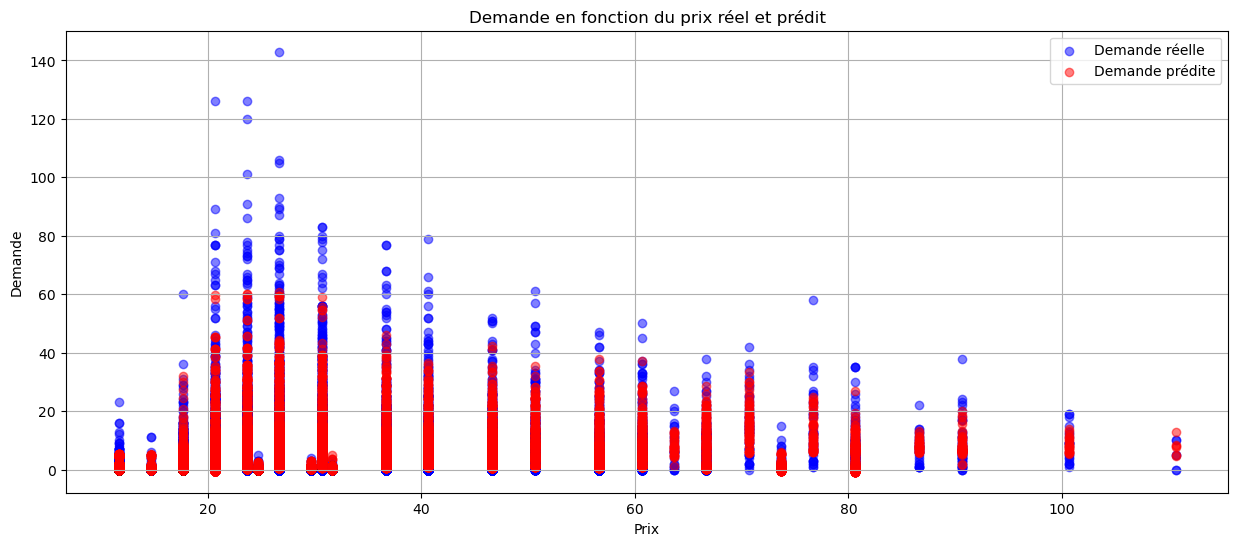

In [98]:
import matplotlib.pyplot as plt

# Prédiction sur l'ensemble de test avec gb_model
y_pred_gb = gb_model.predict(X_test_scaled)

# Tracé de la demande réelle et prédite en fonction du prix
plt.figure(figsize=(15, 6))
plt.scatter(df_test['price'], y_test, label='Demande réelle', color='blue', alpha=0.5)
plt.scatter(df_test['price'], y_pred_gb, label='Demande prédite', color='red', alpha=0.5)
plt.xlabel('Prix')
plt.ylabel('Demande')
plt.title('Demande en fonction du prix réel et prédit')
plt.legend()
plt.grid(True)
plt.show()


/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

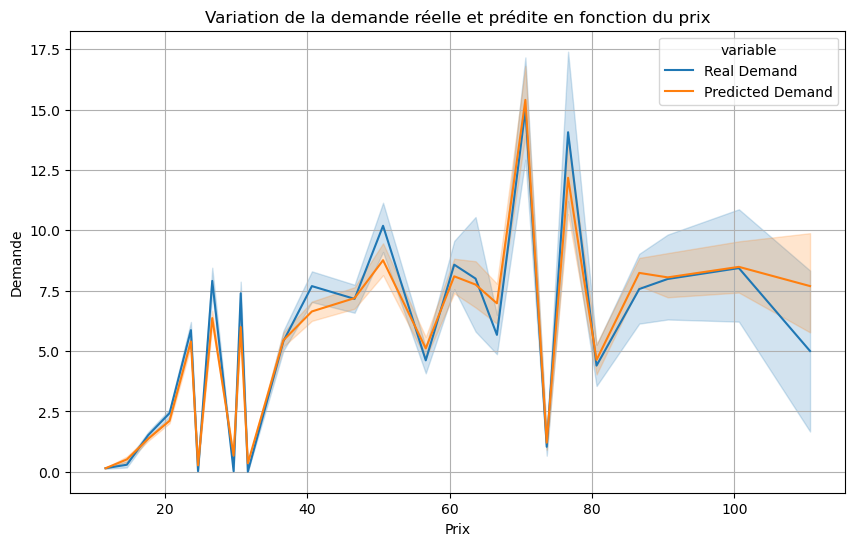

In [99]:

# Création d'un DataFrame avec les données réelles et prédites
df_demand = pd.DataFrame({'Price': df_test['price'], 'Real Demand': y_test, 'Predicted Demand': y_pred_gb})

# Tracé de la demande réelle et prédite en fonction du prix avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Price', y='value', hue='variable', data=pd.melt(df_demand, ['Price']))
plt.xlabel('Prix')
plt.ylabel('Demande')
plt.title('Variation de la demande réelle et prédite en fonction du prix')
plt.grid(True)
plt.show()


• Les graphiques démontrent clairement que notre modèle présente une bonne capacité à prédire la demande en fonction du prix. Cette capacité est d'une importance capitale du point de vue commercial, car elle permet d'anticiper la relation entre le prix des billets de train et la demande correspondante. Une telle anticipation précise est essentielle pour les décideurs commerciaux afin d'optimiser la stratégie de tarification et de maximiser les revenus.

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

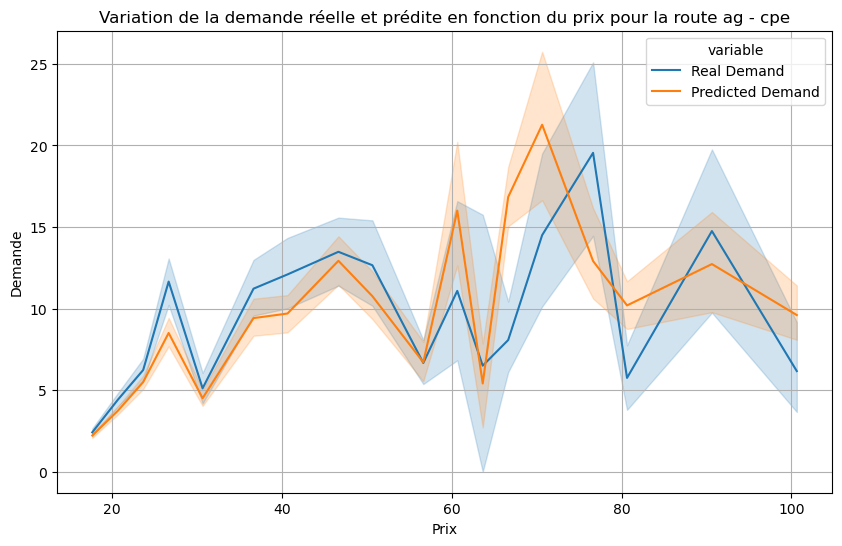

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

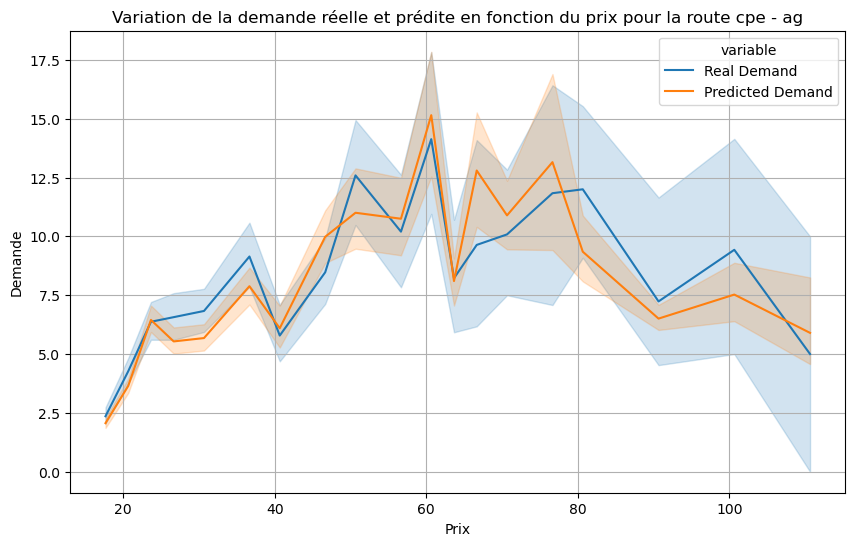

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

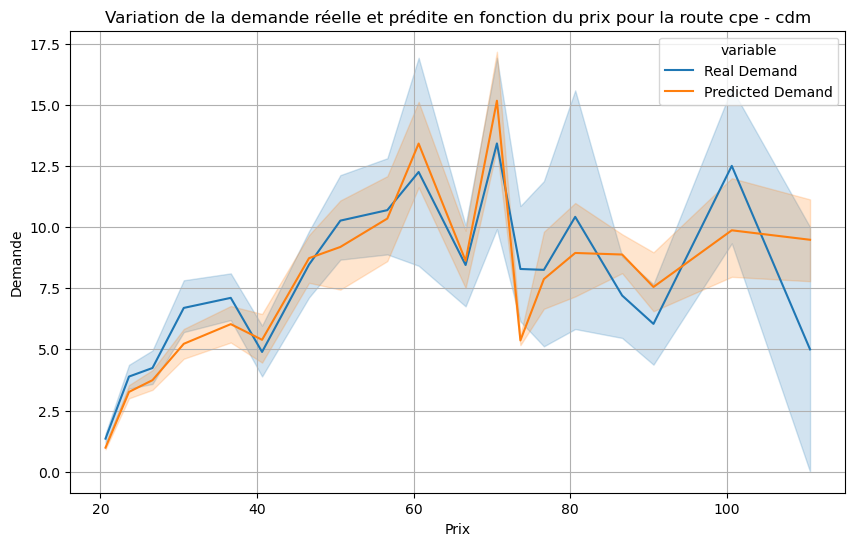

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

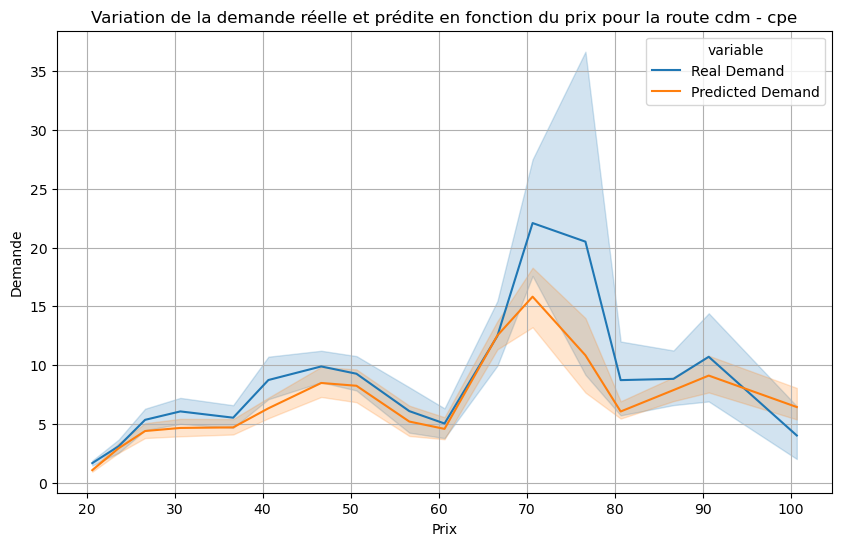

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

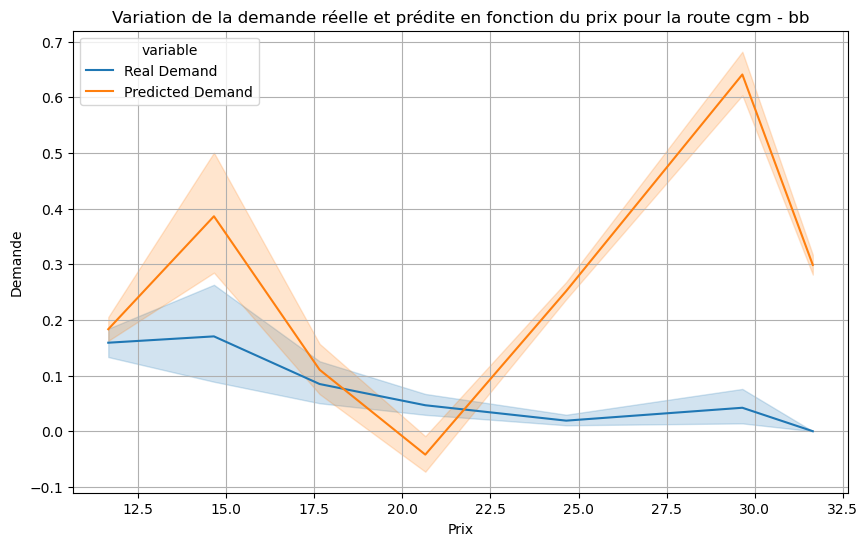

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

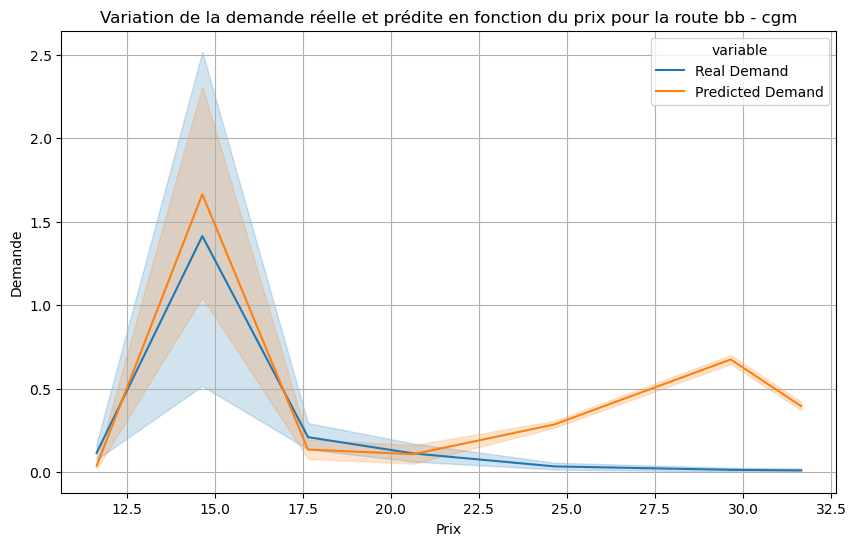

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

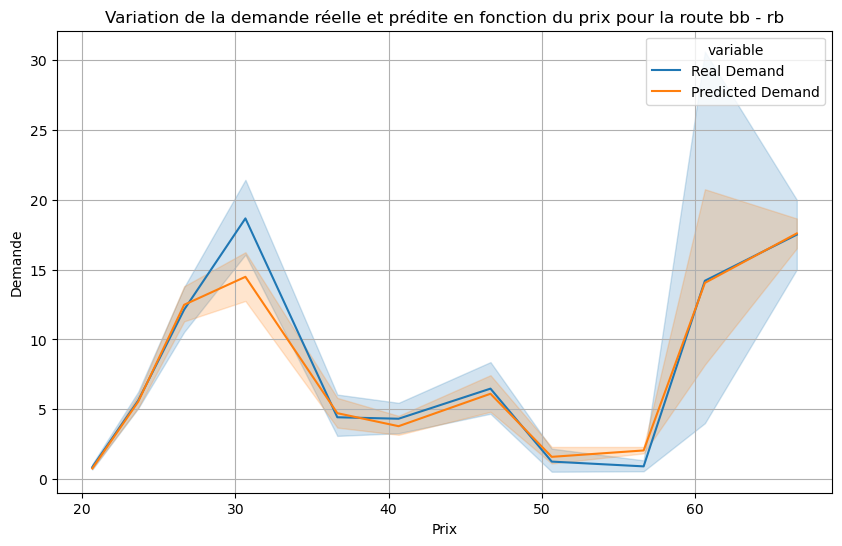

/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saadammari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

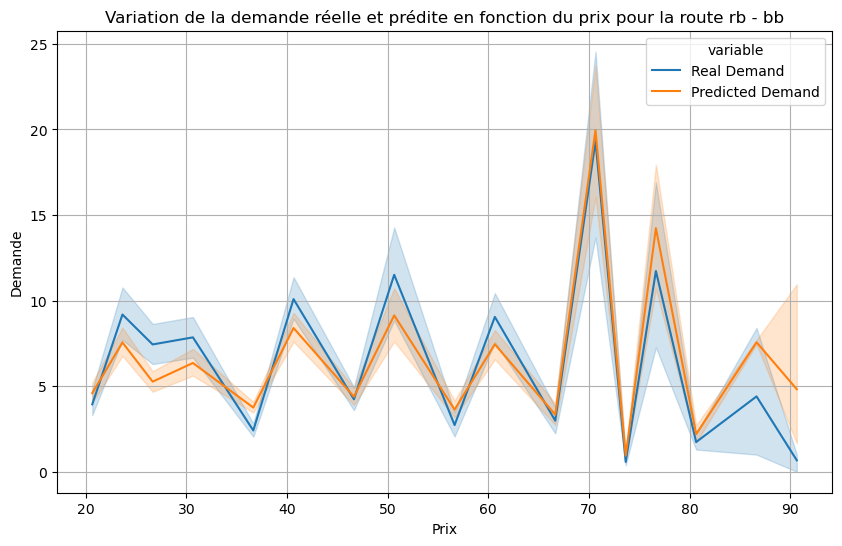

In [100]:
# Création d'une figure pour chaque train_route
for train_route in df_test['train_route'].unique():
    # Filtrer les données pour la train_route spécifique
    df_route = df_test[df_test['train_route'] == train_route]
    
    # Création d'un DataFrame avec les données réelles et prédites pour cette train_route
    df_demand_route = pd.DataFrame({'Price': df_route['price'], 'Real Demand': df_route['demand'], 'Predicted Demand': y_pred_gb[df_route.index]})
    
    # Tracé de la demande réelle et prédite en fonction du prix avec Seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Price', y='value', hue='variable', data=pd.melt(df_demand_route, ['Price']))
    plt.xlabel('Prix')
    plt.ylabel('Demande')
    plt.title(f'Variation de la demande réelle et prédite en fonction du prix pour la route {train_route}')
    plt.grid(True)
    plt.show()


Comme on a pu le conclure lors de l'analyse quantitative le modele est assez bon pour predire la demande en fonction du prix pour tout les trajets sauf cgm-bb et bb-cgm ou il est moins performant peut etre pcq la demande est relativement basse et ces deux trajets sont très frequents 